# KNN no `chb16_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb16_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.714286,1.000000,0.952381,0.904762,0.809524,0.380952,0.666667,0.857143,0.619048,0.619048,0.666667,0.476190,0.523810,0.523810,0.714286,0.571429,0.666667,0.761905
1,0.571429,0.952381,0.952381,0.761905,0.523810,0.619048,0.523810,0.666667,0.523810,0.523810,0.666667,0.428571,0.428571,0.619048,0.714286,0.571429,0.571429,0.714286
2,0.523810,0.952381,1.000000,0.857143,0.666667,0.666667,0.619048,0.809524,0.476190,0.619048,0.619048,0.619048,0.523810,0.428571,0.761905,0.428571,0.619048,0.666667
3,0.761905,1.000000,0.952381,0.714286,0.714286,0.714286,0.714286,0.809524,0.666667,0.619048,0.571429,0.523810,0.523810,0.523810,0.714286,0.476190,0.714286,0.571429
4,0.761905,0.952381,0.952381,0.809524,0.666667,0.809524,0.714286,0.666667,0.619048,0.619048,0.619048,0.619048,0.714286,0.428571,0.809524,0.571429,0.666667,0.666667
5,0.571429,0.952381,0.857143,0.666667,0.619048,0.619048,0.666667,0.666667,0.666667,0.571429,0.666667,0.761905,0.619048,0.619048,0.666667,0.619048,0.714286,0.666667
6,0.666667,1.000000,0.952381,0.857143,0.666667,0.666667,0.761905,0.761905,0.857143,0.523810,0.714286,0.666667,0.666667,0.619048,0.857143,0.476190,0.666667,0.761905
7,0.619048,0.904762,0.857143,0.809524,0.761905,0.761905,0.714286,0.523810,0.714286,0.619048,0.761905,0.666667,0.666667,0.571429,0.809524,0.619048,0.857143,0.571429
8,0.476190,1.000000,1.000000,0.857143,0.666667,0.714286,0.666667,0.761905,0.666667,0.476190,0.761905,0.666667,0.666667,0.428571,0.857143,0.571429,0.714286,0.809524
9,0.571429,0.761905,0.761905,0.809524,0.523810,0.619048,0.809524,0.714286,0.619048,0.761905,0.619048,0.666667,0.619048,0.619048,0.714286,0.571429,0.571429,0.666667


,count,mean,std,min,25%,50%,75%,max
1,20.0,0.957143,0.065365,0.761905,0.952381,0.976190,1.000000,1.000000
2,20.0,0.919048,0.067520,0.761905,0.857143,0.952381,0.952381,1.000000
3,20.0,0.780952,0.079382,0.619048,0.714286,0.809524,0.821429,0.904762
14,20.0,0.719048,0.073933,0.619048,0.666667,0.714286,0.761905,0.857143
16,20.0,0.700000,0.080427,0.571429,0.666667,0.690476,0.726190,0.857143
7,20.0,0.690476,0.094609,0.523810,0.654762,0.690476,0.761905,0.857143
6,20.0,0.680952,0.072630,0.523810,0.654762,0.666667,0.714286,0.809524
5,20.0,0.680952,0.102598,0.380952,0.619048,0.714286,0.761905,0.809524
17,20.0,0.661905,0.101192,0.476190,0.571429,0.666667,0.726190,0.857143
4,20.0,0.654762,0.113400,0.428571,0.595238,0.666667,0.726190,0.857143


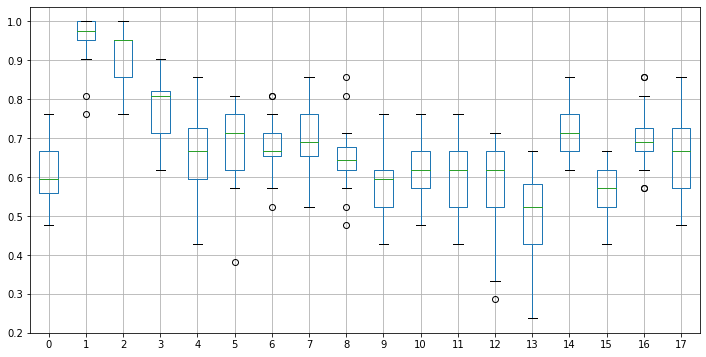

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '16'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.611905,0.087771,0.595238,16,0
1,0.957143,0.065365,0.976190,16,1
2,0.919048,0.067520,0.952381,16,2
3,0.780952,0.079382,0.809524,16,3
4,0.654762,0.113400,0.666667,16,4
5,0.680952,0.102598,0.714286,16,5
6,0.680952,0.072630,0.666667,16,6
7,0.690476,0.094609,0.690476,16,7
8,0.652381,0.086159,0.642857,16,8
9,0.588095,0.089121,0.595238,16,9
